<a href="https://colab.research.google.com/github/kaushil24/GAN/blob/master/DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/ML Projects/GAN')
os.listdir()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import torchvision
import torchvision.transforms as transforms

Getting the dataset:

(60000, 28, 28)


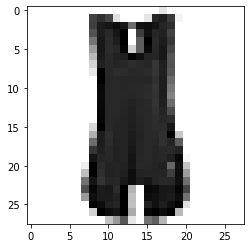

In [0]:
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt

imagefile = 'fashion-MNIST-idx3-ubyte'
imagearray = idx2numpy.convert_from_file(imagefile)

plt.imshow(imagearray[4], cmap=plt.cm.binary)
print(imagearray.shape)

# Building GANs

## Making discriminator:

In [0]:
CHANNEL = 1

In [0]:
nn.Conv2d()

In [0]:
class Discriminator(nn.Module):    
    def __init__(self, channels, features):
        super(Descriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_channels= channels, out_channels = features, kernel_size = 4, stride = 2, padding = 1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(in_channels = features, out_channels = features * 2, kernel_size = 4, stride = 2, padding = 1),
            nn.BatchNorm2d(num_features = features * 2),
            nn.LeakyReLU(0.2),
            nn.Conv2d(in_channels = features * 2, out_channels = features * 4, kernel_size = 4, stride = 2, padding = 1),
            nn.BatchNorm2d(num_features = features * 4),
            nn.LeakyReLU(0.2),
            nn.Conv2d(in_channels = features * 4, out_channels = features * 8, kernel_size = 4, stride = 2, padding = 1),
            nn.BatchNorm2d(num_features = features * 8),
            nn.LeakyReLU(0.2),
            nn.Conv2d(in_channels = features * 8, out_channels = 1, kernel_size = 4, stride = 2, padding = 0),
            nn.Sigmoid()
            )
        
    def forward(self, x):
        x = self.net(x)
        return x

'''
nn.ConvTranspose2d(
    in_channels,
    out_channels,
    kernel_size,
    stride=1,
    padding=0,
    output_padding=0,
    groups=1,
    bias=True,
    dilation=1,
    padding_mode='zeros',
)
'''
class Generator(nn.Module):
    def __init__(self, noise_size, channels, features):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.ConvTranspose2d(in_channels = noise_size, out_channels = features*16, kernel_size = 4, stride = 1, padding = 0),
            nn.BatchNorm2d(features * 16),
            nn.ReLU(),
            
            nn.ConvTranspose2d(in_channels = features * 16, out_channels = features * 8, kernel_size = 4, stride = 2, padding = 1),
            nn.BatchNorm2d(num_features = features * 8),
            nn.ReLU(),
            
            nn.ConvTranspose2d(in_channels = features * 8, out_channels = features * 4, kernel_size = 4, stride = 2, padding = 1),
            nn.BatchNorm2d(num_features = features * 4),
            nn.ReLU(),
            
            nn.ConvTranspose2d(in_channels = features * 4, out_channels = features * 2, kernel_size = 4, stride = 2, padding = 1),
            nn.BatchNorm2d(num_features = features * 2),
            nn.ReLU(),
            
            nn.ConvTranspose2d(in_channels = features * 2, out_channels = channels, kernel_size = 4, stride = 2, padding = 1),
            nn.Tanh()
        )
        
    def forward(self, x):
        return self.net(x)
    
    
### TESTING FORWARD PASS IN DESCRIMINATOR:
# img_channels = 3
# img_size = 64
# features = 4
# batch_size = 5
# rand = torch.rand((batch_size, img_channels, img_size, img_size)).float()
# nn = Discriminator(img_channels, features)
# c = nn.forward(rand)

### TESTING FORWARD PASS IN GENERATOR:
# noise_size = 100
# output_img_channels = 3
# batch_size = 5
# features = 4
# rand = torch.rand((batch_size, noise_size, 1, 1)).float()
# nn = Generator(noise_size, output_img_channels , features)
# c = nn.forward(rand)